In [45]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
df = pd.read_csv("C://New Volume D//CodSoft//Movie Rating Prediction//IMDb Movies India.csv", encoding='latin1')


In [47]:
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [48]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [49]:
df.drop(['Name'],axis=1,inplace=True)

In [50]:
df.ffill(inplace=True)


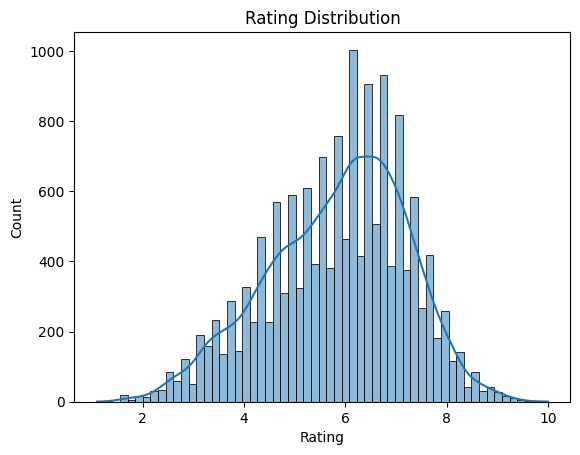

In [52]:

# Rating distribution
sns.histplot(df['Rating'], kde=True)
plt.title("Rating Distribution")
plt.show()



In [21]:
label_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col].astype(str))

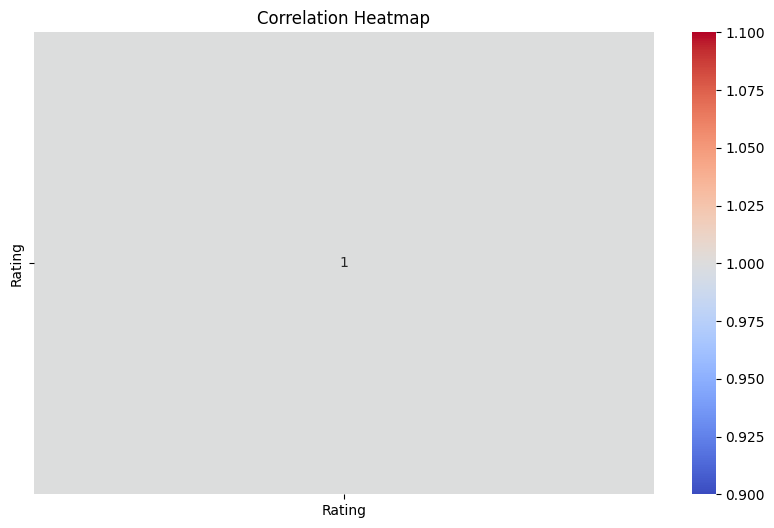

In [53]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [22]:
df['Votes'] = pd.to_numeric(df['Votes'].astype(str).str.replace(',', ''), errors='coerce')
df['Year'] = pd.to_numeric(df['Year'].astype(str), errors='coerce')
df['Duration'] = pd.to_numeric(df['Duration'].astype(str).str.extract(r'(\d+)')[0], errors='coerce')


In [23]:
df.ffill(inplace=True)


In [30]:
X=df.drop(['Rating'],axis=1)
y=df['Rating']
y_test = np.array(y_test)
y_pred = np.array(y_pred)

mask = ~np.isnan(y_test) & ~np.isnan(y_pred)  
y_test_clean = y_test[mask]
y_pred_clean = y_pred[mask]

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [41]:
lgb_model = lgb.LGBMRegressor(
    objective='regression', 
    learning_rate=0.3,  
    random_state=42
)
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000892 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1649
[LightGBM] [Info] Number of data points in the train set: 12407, number of used features: 7
[LightGBM] [Info] Start training from score 5.853502


LGBMRegressor(learning_rate=0.3, objective='regression', random_state=42)

In [40]:
print(df['Rating'].describe())


count    15508.000000
mean         5.843765
std          1.366908
min          1.100000
25%          4.900000
50%          6.000000
75%          6.800000
max         10.000000
Name: Rating, dtype: float64


In [43]:
mse = mean_squared_error(y_test_clean, y_pred_clean)
mae = mean_absolute_error(y_test_clean, y_pred_clean)
r2 = r2_score(y_test_clean, y_pred_clean)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)

MSE: 1.5986298357124007
MAE: 0.994622075174741
R²: 0.17285922450712954


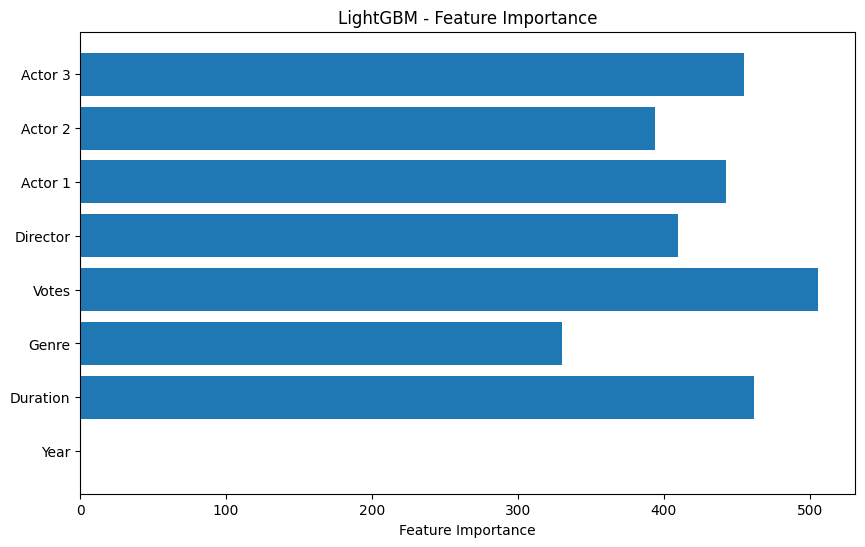

In [44]:
feature_importance = lgb_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance")
plt.title("LightGBM - Feature Importance")
plt.show()